In [3]:
from skimage import morphology
from skimage import measure
from sklearn.cluster import KMeans
from skimage.transform import resize
from skimage.exposure import equalize_hist
from scipy import ndimage
from skimage import filters
# from scipy.signal import medfilt
# import np_image
import SimpleITK as sitk
import numpy as np
import csv
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

file_list = glob("../../subset0/" + "*.mhd")
# print(file_list)
    

In [2]:
def getRegionProps(img):
    labels = measure.label(img)

    label_vals = np.unique(labels)
    regions = measure.regionprops(labels)

    good_labels = []
    for prop in regions:
        B = prop.bbox
        if B[2]-B[0]<475 and B[3]-B[1]<475 and B[0]>40 and B[2]<472:
            good_labels.append(prop.label)

    mask = np.ndarray([512,512],dtype=np.int8)
    mask[:] = 0

    for N in good_labels:
        mask = mask + np.where(labels==N,1,0)
        
    plt.title("Mask")
    plt.imshow(mask,cmap="gray")
    plt.show()

    return mask

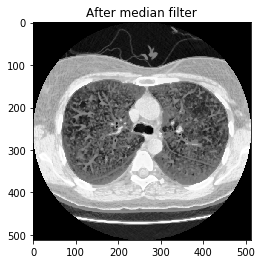

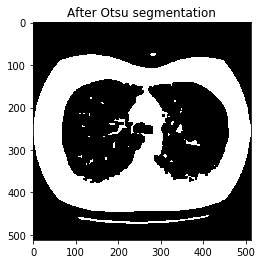

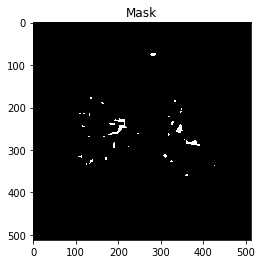

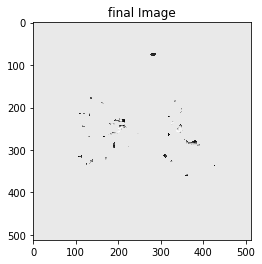

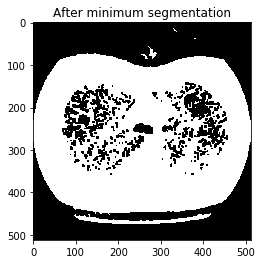

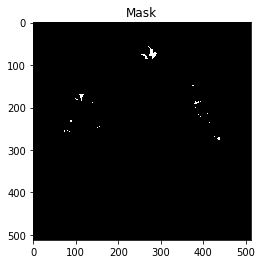

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


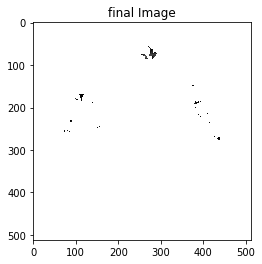

In [8]:
for img_file in file_list[0:1]:
#     print(img_file)
    itk_img=sitk.ReadImage(img_file)
    img_array=sitk.GetArrayFromImage(itk_img)
    imgs_to_process=img_array.astype(np.float64)
    for i in range(0,1):
        img=imgs_to_process[300]
#         plt.subplot(3,2,1)
#         plt.title("Original Image")
#         plt.imshow(img,cmap="gray")
#         plt.show()
        range1=np.max(img)-np.min(img)
        img=img-np.min(img)
        img=img/range1
#         plt.subplot(3,2,2)
#         plt.title("Normalised image")
#         plt.imshow(img,cmap="gray")
#         plt.show()
#         print(np.min(img)) #0
#         print(np.max(img)) #1
#         print(img[0])
#         plt.hist(img.flatten(),100)
#         plt.title("original Image")
#         plt.show()
        img = equalize_hist(img)
#         plt.title("Histogram equlised image")
#         plt.imshow(img,cmap="gray")
#         plt.show()
#         plt.hist(img.flatten(),100)
#         plt.title("After equlaistaion")
#         plt.show()
        img=ndimage.median_filter(img,3)
        plt.title("After median filter")
        plt.imshow(img,cmap="gray")
        plt.show()
#         to compare all thresholds
#         fig, ax = filters.try_all_threshold(img, figsize=(10, 8), verbose=False)
#         plt.show()
        thresh=filters.threshold_otsu(img)
        otsu=img>thresh
        otsu=morphology.erosion(otsu,np.ones([6,6]))
        otsu=morphology.dilation(otsu)
        plt.title("After Otsu segmentation")
        plt.imshow(otsu,cmap="gray")
        plt.show()
        
        
        
        mask=getRegionProps(otsu)
        img_fin=imgs_to_process[300]*mask
        plt.title("final Image")
        plt.imshow(img_fin,cmap="gray")

        plt.show()

        thresh=filters.threshold_minimum(img)
        minimum=img>thresh
        minimum=morphology.dilation(minimum)
        minimum=morphology.erosion(minimum,np.ones([4,4]))
        plt.title("After minimum segmentation")
        plt.imshow(minimum,cmap="gray")
        plt.show()
        mask=getRegionProps(minimum)
        print(mask)
        img_fin=imgs_to_process[300]*mask
        plt.title("final Image")
        plt.imshow(img_fin,cmap="gray")

        plt.show()
#         plt.hist(img.flatten(),100)
#         plt.title("After equlaistaion")
#         plt.show()

In [18]:
from skimage import data
img=data.page()
img.shape

(191, 384)